In [1]:
!pip install WordCloud


In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/ByteTel Customer Interaction 2023.csv')
df.head()

,EmployeeID,Timestamp,NoteType,CustomerInteraction,EmployeeNote,FollowUpActionTaken,Outcome,AnonymizedID
0,E001,01-10-2023 09:45,Call Centre Agent,New Product Inquiry,Customer inquired about new broadband package.,Sent product details,Resolved,A1234
1,E002,01-10-2023 10:30,Engineer,Service Disruption,Checked customer's line. Cable damage identified.,Dispatched service team,Pending,A1235
2,E003,01-10-2023 11:15,Call Centre Agent,Billing Issue,Customer claims overcharge on recent bill.,Reviewed billing details,Resolved,A1236
3,E004,01-10-2023 12:05,Engineer,Service Disruption,Replaced damaged equipment at site.,Service restored,Resolved,A1237
4,E001,01-10-2023 13:40,Call Centre Agent,New Product Inquiry,Inquired about new TV packages and offers.,Sent promotional offers,Resolved,A1238


In [5]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)
df['Cleaned_note'] =df['EmployeeNote'].apply(remove_special_characters)
df.head()

,EmployeeID,Timestamp,NoteType,CustomerInteraction,EmployeeNote,FollowUpActionTaken,Outcome,AnonymizedID,Cleaned_note
0,E001,01-10-2023 09:45,Call Centre Agent,New Product Inquiry,Customer inquired about new broadband package.,Sent product details,Resolved,A1234,Customer inquired about new broadband package
1,E002,01-10-2023 10:30,Engineer,Service Disruption,Checked customer's line. Cable damage identified.,Dispatched service team,Pending,A1235,Checked customers line Cable damage identified
2,E003,01-10-2023 11:15,Call Centre Agent,Billing Issue,Customer claims overcharge on recent bill.,Reviewed billing details,Resolved,A1236,Customer claims overcharge on recent bill
3,E004,01-10-2023 12:05,Engineer,Service Disruption,Replaced damaged equipment at site.,Service restored,Resolved,A1237,Replaced damaged equipment at site
4,E001,01-10-2023 13:40,Call Centre Agent,New Product Inquiry,Inquired about new TV packages and offers.,Sent promotional offers,Resolved,A1238,Inquired about new TV packages and offers


In [6]:
df['Cleaned_note'] = df['Cleaned_note'].str.lower()
df.head()

,EmployeeID,Timestamp,NoteType,CustomerInteraction,EmployeeNote,FollowUpActionTaken,Outcome,AnonymizedID,Cleaned_note
0,E001,01-10-2023 09:45,Call Centre Agent,New Product Inquiry,Customer inquired about new broadband package.,Sent product details,Resolved,A1234,customer inquired about new broadband package
1,E002,01-10-2023 10:30,Engineer,Service Disruption,Checked customer's line. Cable damage identified.,Dispatched service team,Pending,A1235,checked customers line cable damage identified
2,E003,01-10-2023 11:15,Call Centre Agent,Billing Issue,Customer claims overcharge on recent bill.,Reviewed billing details,Resolved,A1236,customer claims overcharge on recent bill
3,E004,01-10-2023 12:05,Engineer,Service Disruption,Replaced damaged equipment at site.,Service restored,Resolved,A1237,replaced damaged equipment at site
4,E001,01-10-2023 13:40,Call Centre Agent,New Product Inquiry,Inquired about new TV packages and offers.,Sent promotional offers,Resolved,A1238,inquired about new tv packages and offers


In [9]:
nltk.download('punkt') # Corrected function name to nltk.download

df['tokenized_note'] = df['Cleaned_note'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
 df.head()

,EmployeeID,Timestamp,NoteType,CustomerInteraction,EmployeeNote,FollowUpActionTaken,Outcome,AnonymizedID,Cleaned_note,tokenized_note
0,E001,01-10-2023 09:45,Call Centre Agent,New Product Inquiry,Customer inquired about new broadband package.,Sent product details,Resolved,A1234,customer inquired about new broadband package,"[customer, inquired, about, new, broadband, pa..."
1,E002,01-10-2023 10:30,Engineer,Service Disruption,Checked customer's line. Cable damage identified.,Dispatched service team,Pending,A1235,checked customers line cable damage identified,"[checked, customers, line, cable, damage, iden..."
2,E003,01-10-2023 11:15,Call Centre Agent,Billing Issue,Customer claims overcharge on recent bill.,Reviewed billing details,Resolved,A1236,customer claims overcharge on recent bill,"[customer, claims, overcharge, on, recent, bill]"
3,E004,01-10-2023 12:05,Engineer,Service Disruption,Replaced damaged equipment at site.,Service restored,Resolved,A1237,replaced damaged equipment at site,"[replaced, damaged, equipment, at, site]"
4,E001,01-10-2023 13:40,Call Centre Agent,New Product Inquiry,Inquired about new TV packages and offers.,Sent promotional offers,Resolved,A1238,inquired about new tv packages and offers,"[inquired, about, new, tv, packages, and, offers]"


In [12]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
df['lemmatized_note'] = df['tokenized_note'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
df.head()

,EmployeeID,Timestamp,NoteType,CustomerInteraction,EmployeeNote,FollowUpActionTaken,Outcome,AnonymizedID,Cleaned_note,tokenized_note,lemmatized_note
0,E001,01-10-2023 09:45,Call Centre Agent,New Product Inquiry,Customer inquired about new broadband package.,Sent product details,Resolved,A1234,customer inquired about new broadband package,"[customer, inquired, about, new, broadband, pa...","[customer, inquired, about, new, broadband, pa..."
1,E002,01-10-2023 10:30,Engineer,Service Disruption,Checked customer's line. Cable damage identified.,Dispatched service team,Pending,A1235,checked customers line cable damage identified,"[checked, customers, line, cable, damage, iden...","[checked, customer, line, cable, damage, ident..."
2,E003,01-10-2023 11:15,Call Centre Agent,Billing Issue,Customer claims overcharge on recent bill.,Reviewed billing details,Resolved,A1236,customer claims overcharge on recent bill,"[customer, claims, overcharge, on, recent, bill]","[customer, claim, overcharge, on, recent, bill]"
3,E004,01-10-2023 12:05,Engineer,Service Disruption,Replaced damaged equipment at site.,Service restored,Resolved,A1237,replaced damaged equipment at site,"[replaced, damaged, equipment, at, site]","[replaced, damaged, equipment, at, site]"
4,E001,01-10-2023 13:40,Call Centre Agent,New Product Inquiry,Inquired about new TV packages and offers.,Sent promotional offers,Resolved,A1238,inquired about new tv packages and offers,"[inquired, about, new, tv, packages, and, offers]","[inquired, about, new, tv, package, and, offer]"


In [14]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['lemmatized_note'] = df['lemmatized_note'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
df.head()

,EmployeeID,Timestamp,NoteType,CustomerInteraction,EmployeeNote,FollowUpActionTaken,Outcome,AnonymizedID,Cleaned_note,tokenized_note,lemmatized_note
0,E001,01-10-2023 09:45,Call Centre Agent,New Product Inquiry,Customer inquired about new broadband package.,Sent product details,Resolved,A1234,customer inquired about new broadband package,"[customer, inquired, about, new, broadband, pa...","[customer, inquired, new, broadband, package]"
1,E002,01-10-2023 10:30,Engineer,Service Disruption,Checked customer's line. Cable damage identified.,Dispatched service team,Pending,A1235,checked customers line cable damage identified,"[checked, customers, line, cable, damage, iden...","[checked, customer, line, cable, damage, ident..."
2,E003,01-10-2023 11:15,Call Centre Agent,Billing Issue,Customer claims overcharge on recent bill.,Reviewed billing details,Resolved,A1236,customer claims overcharge on recent bill,"[customer, claims, overcharge, on, recent, bill]","[customer, claim, overcharge, recent, bill]"
3,E004,01-10-2023 12:05,Engineer,Service Disruption,Replaced damaged equipment at site.,Service restored,Resolved,A1237,replaced damaged equipment at site,"[replaced, damaged, equipment, at, site]","[replaced, damaged, equipment, site]"
4,E001,01-10-2023 13:40,Call Centre Agent,New Product Inquiry,Inquired about new TV packages and offers.,Sent promotional offers,Resolved,A1238,inquired about new tv packages and offers,"[inquired, about, new, tv, packages, and, offers]","[inquired, new, tv, package, offer]"


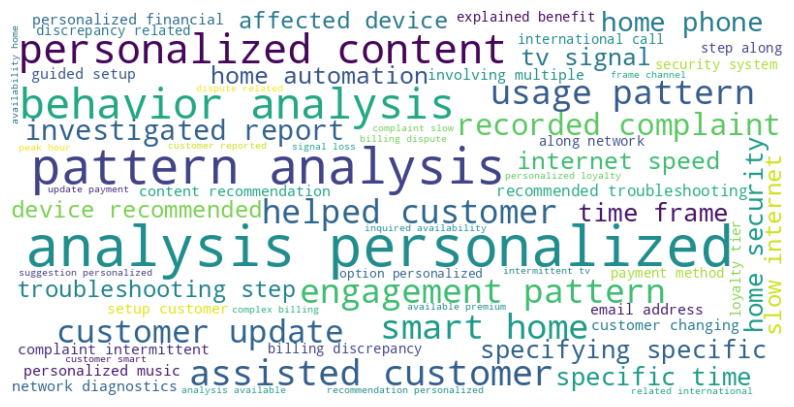

In [21]:
all_words = ' '.join([' '.join(words) for words in df['lemmatized_note']])

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', min_font_size = 10).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [22]:
from PIL import Image
import numpy as np

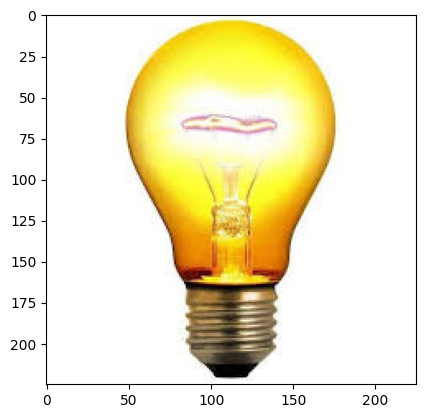

In [32]:
mask_image_path = '/content/bulb2.jpeg'
background_image= np.array(Image.open(mask_image_path))
plt.imshow(background_image)

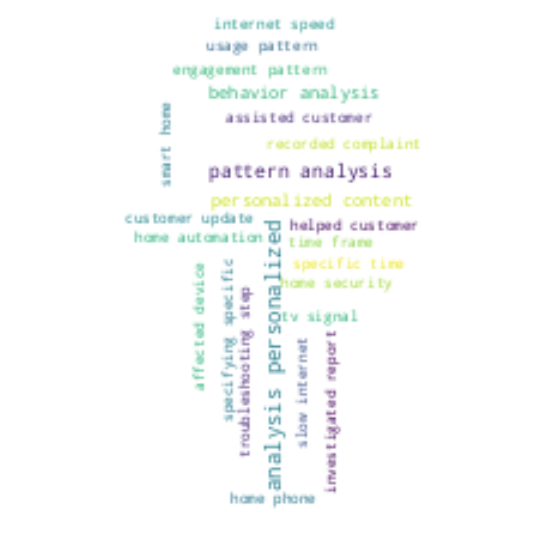

In [34]:
word_cloud2 = WordCloud(width = 2048, height = 1080, background_color = 'white',mask = background_image).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(word_cloud2, interpolation = 'bilinear')
plt.axis('off')
plt.show()

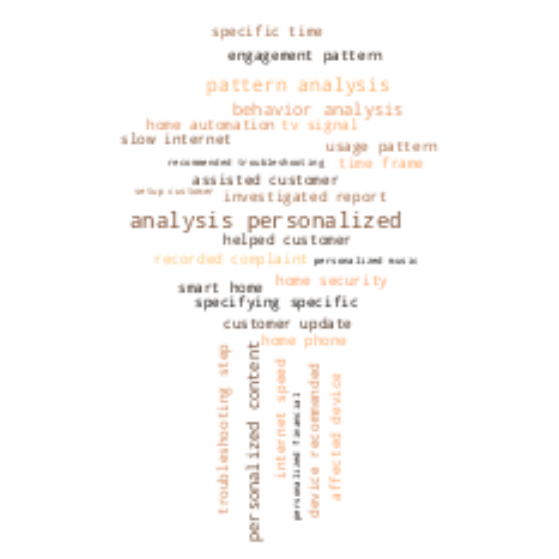

In [37]:
word_cloud2 = WordCloud(width = 2048, height = 1080, background_color = 'white',mask = background_image,contour_color = 'white', colormap = 'copper').generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(word_cloud2, interpolation = 'bilinear')
plt.axis('off')
plt.show()